Escolha uma base de dados. Essa base deve ser multivariada e possuir uma variável objetivo, que pode ser usada na fase de treino 
(modelos supervisionados) e/ou na validação do modelo (modelos supervisionados e não-supervisionados)
OBS: Caso você não possua uma base, utilize a base de dados de vinho brancos. Considere bons vinhos aqueles que obtiveram notas >= 6.
 Como motivo da escolha  (questão 2.a) apenas indique utilizou a base proposta pelo professor.
 Explique a origem dos dados e o motivo para a escolha. Descreva, também, como os dados foram obtidos. Essa é a fase de COMPREENSÃO 
DO NEGÓCIO.

 RESPONDENDO:

 Utilizando vinhos brancos, bons com notas >=6 . Motivo: base proposta pelo professor.
 
 Esta é uma base real, apresentada no artigo: 
 P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. 
 - Link para o artigo  : https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377 
 - Para a base de dados: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

A partir da base de dados sugerida de vinhos brancos, vou realizar as etapas do modelo CRISP de desenvolvimento de projetos em Ciência de Dados.

RESPONDENDO:

Compreensão do Negócio:
A base de dados de vinhos brancos é uma escolha comum para análise e modelagem na área de Ciência de Dados, devido à sua disponibilidade e variedade de informações relevantes. Esses dados são úteis para avaliar a qualidade dos vinhos brancos e identificar padrões que possam influenciar essa qualidade.

Compreensão dos Dados:
As variáveis presentes na base de dados de vinhos brancos incluem características físico-químicas, como acidez, teor alcoólico, pH, dentre outras, além da variável objetivo, que é a qualidade do vinho. A maioria das variáveis é numérica, enquanto a qualidade é uma variável categórica ordinal (mais detalhes na tabela abaixo).

Para obter uma compreensão inicial dos dados, podemos criar histogramas (abaixo) para visualizar a distribuição de cada variável e sua faixa dinâmica. Isso nos ajudará a entender a amplitude e a dispersão dos valores em cada variável, bem como possíveis desequilíbrios nos dados.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    RocCurveDisplay
)

In [3]:
wines = pd.read_csv('winequalityN.csv')
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
removed_rows = (len(wines.dropna()) / len(wines)) - 1
print(f"Remover os valores com NA diminui {abs(removed_rows) * 100:.2f}% da base original de vinhos.")
wines = wines.dropna()

Remover os valores com NA diminui 0.52% da base original de vinhos.


In [5]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [6]:
wines['opinion'] = [0 if quality <6 else 1 for quality in wines['quality']]
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [7]:
wines.type.value_counts()

white    4870
red      1593
Name: type, dtype: int64

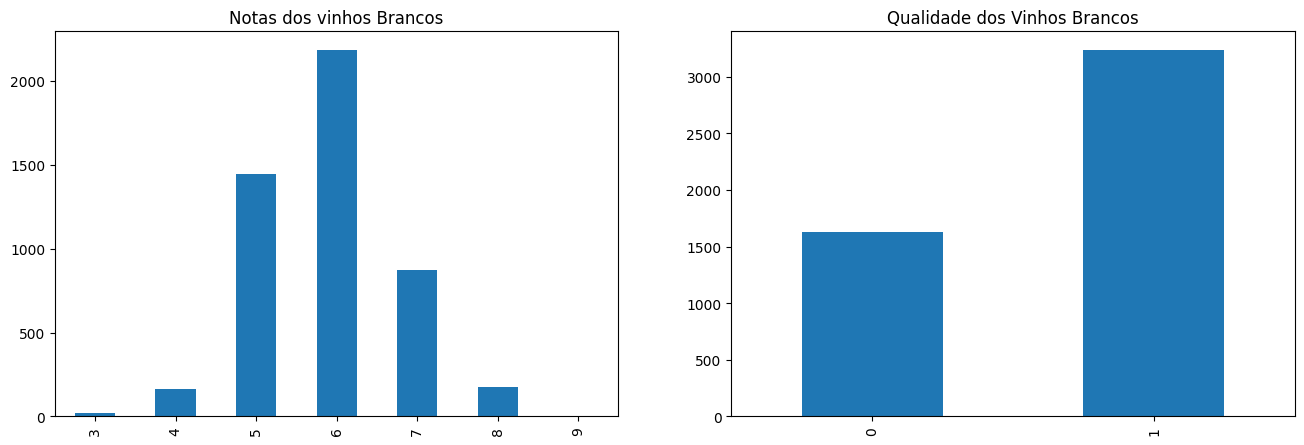

In [8]:
# Modelo para vinhos brancos (white wines)

white_wines = wines[wines.type == 'white'].reset_index().drop('index', axis=1)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))
ax = plt.subplot(121)
white_wines.quality.value_counts().sort_index(ascending=True).plot.bar()
ax.set_title('Notas dos vinhos Brancos')
ax = plt.subplot(122)
white_wines.opinion.value_counts().sort_index(ascending=True).plot.bar()
ax.set_title('Qualidade dos Vinhos Brancos');


Descreva as variáveis do problema e o tipo de cada uma (categórica ou numérica). Mostre a distribuição (usando um histograma) 
para cada uma delas. 
Comente sobre a faixa dinâmica de cada uma delas. Essa é a fase de COMPREENSÃO DOS DADOS. 
Descreva o objetivo do modelo que será criado neste projeto.

RESPONDENDO:

In [9]:
# Descrição das variáveis

white_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,6.855123,0.278071,0.334199,6.394343,0.045771,35.317146,138.340144,0.994026,3.188154,0.489700,10.516772,5.878029,0.665298
std,0.843444,0.100528,0.120915,5.070853,0.021846,17.012967,42.490515,0.002993,0.150902,0.114196,1.231251,0.885699,0.471935
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993735,3.180000,0.470000,10.400000,6.000000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


| **Variável**         |  **Tipo**  | **Valor Médio** | **Desvio Padrão** |
|----------------------|:----------:|:---------------:|:-----------------:|
| type                 | Categórica |        -        |         -         |
| fixed acidity        |  Contínua  |       6.85      |        0.84       |
| volatile acidity     |  Contínua  |       0.27      |        0.10       |
| citric acid          |  Contínua  |       0.33      |        0.12       |
| residual sugar       |  Contínua  |       6.39      |        5.07       |
| chlorides            |  Contínua  |       0.04      |        0.02       |
| free sulfur dioxide  |  Contínua  |       35.3      |       17.01       |
| total sulfur dioxide |  Contínua  |      138.34     |       42.49       |
| density              |  Contínua  |       0.99      |       0.0029      |
| pH                   |  Contínua  |       3.18      |        0.15       |
| sulphates            |  Contínua  |       0.48      |        0.11       |
| quality              | Categórica |        -        |         -         |
| opinion              | Categórica |        -        |         -         |

In [10]:
white_wines = white_wines.drop(columns=['type', 'quality'])
features = white_wines.columns.drop('opinion')
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

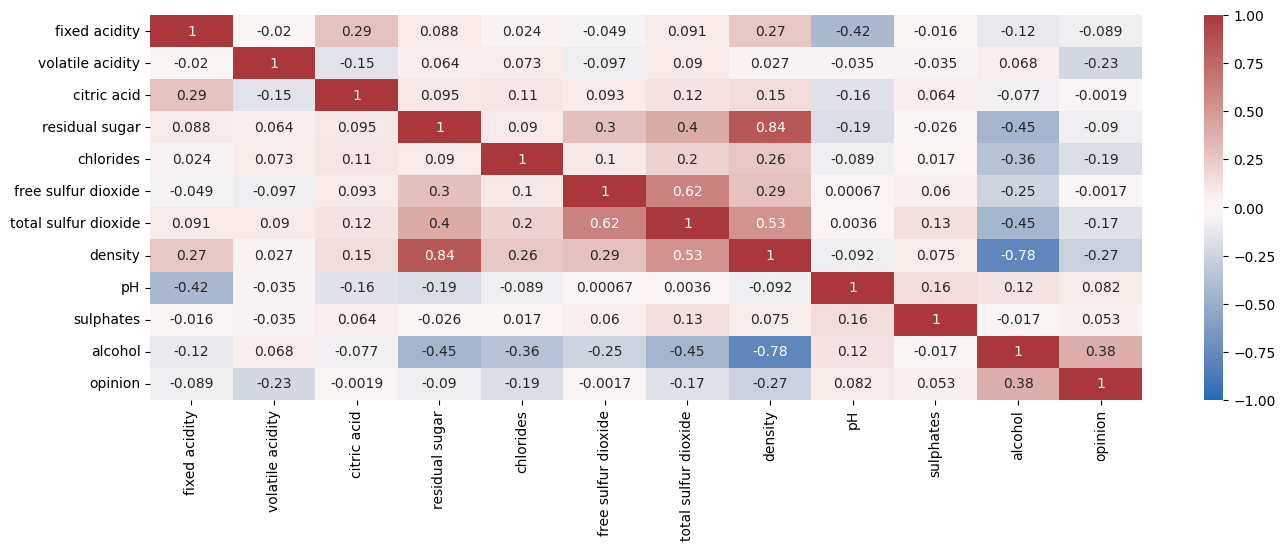

In [11]:
# Analisando as correlações

fig, ax = plt.subplots(1, 1, figsize=(16, 5))
sns.heatmap(white_wines.corr(), vmin=-1, vmax=1, annot=True, ax=ax, cmap='vlag');

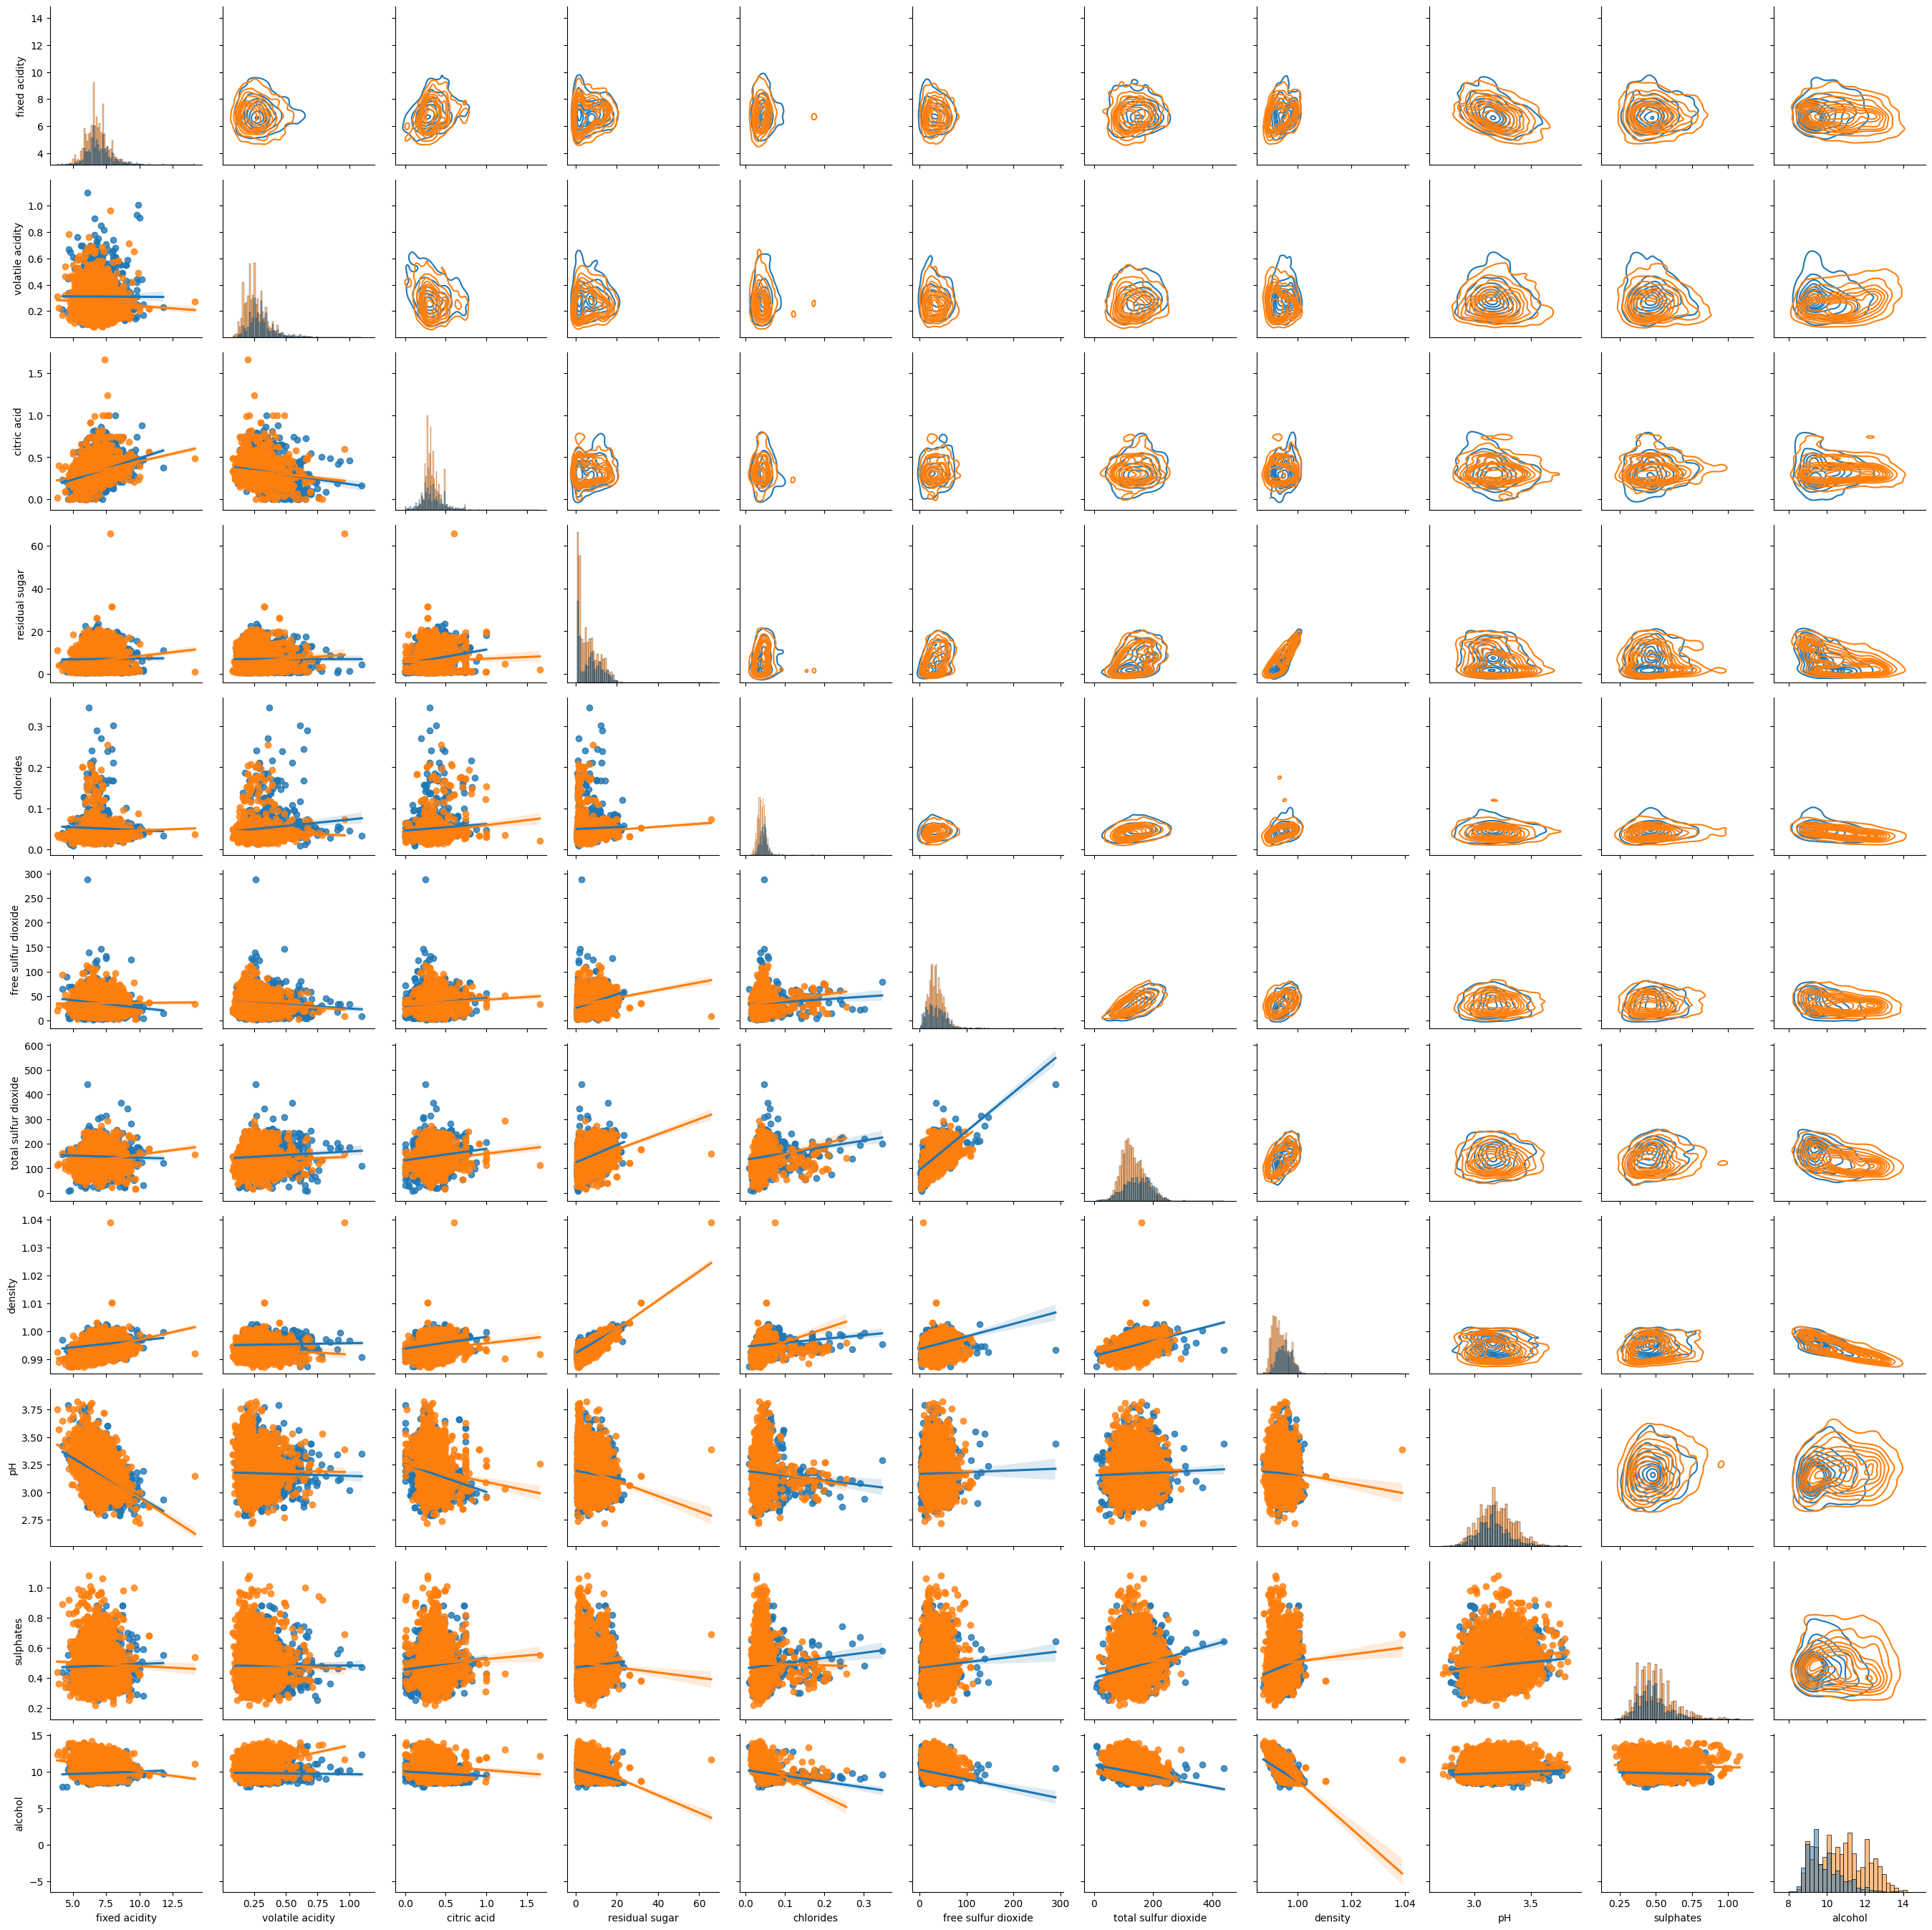

In [12]:
g = sns.PairGrid(white_wines, hue='opinion')
g.map_lower(sns.regplot)
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot);

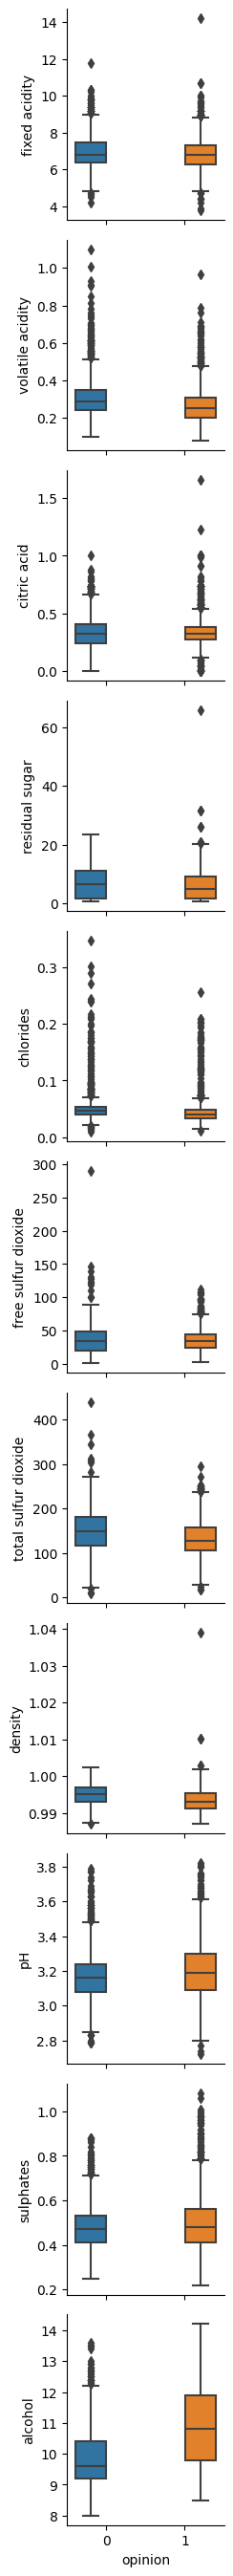

In [13]:
# Checando Outliers 

g = sns.PairGrid(white_wines, hue='opinion', x_vars='opinion')
g.map(sns.boxplot);

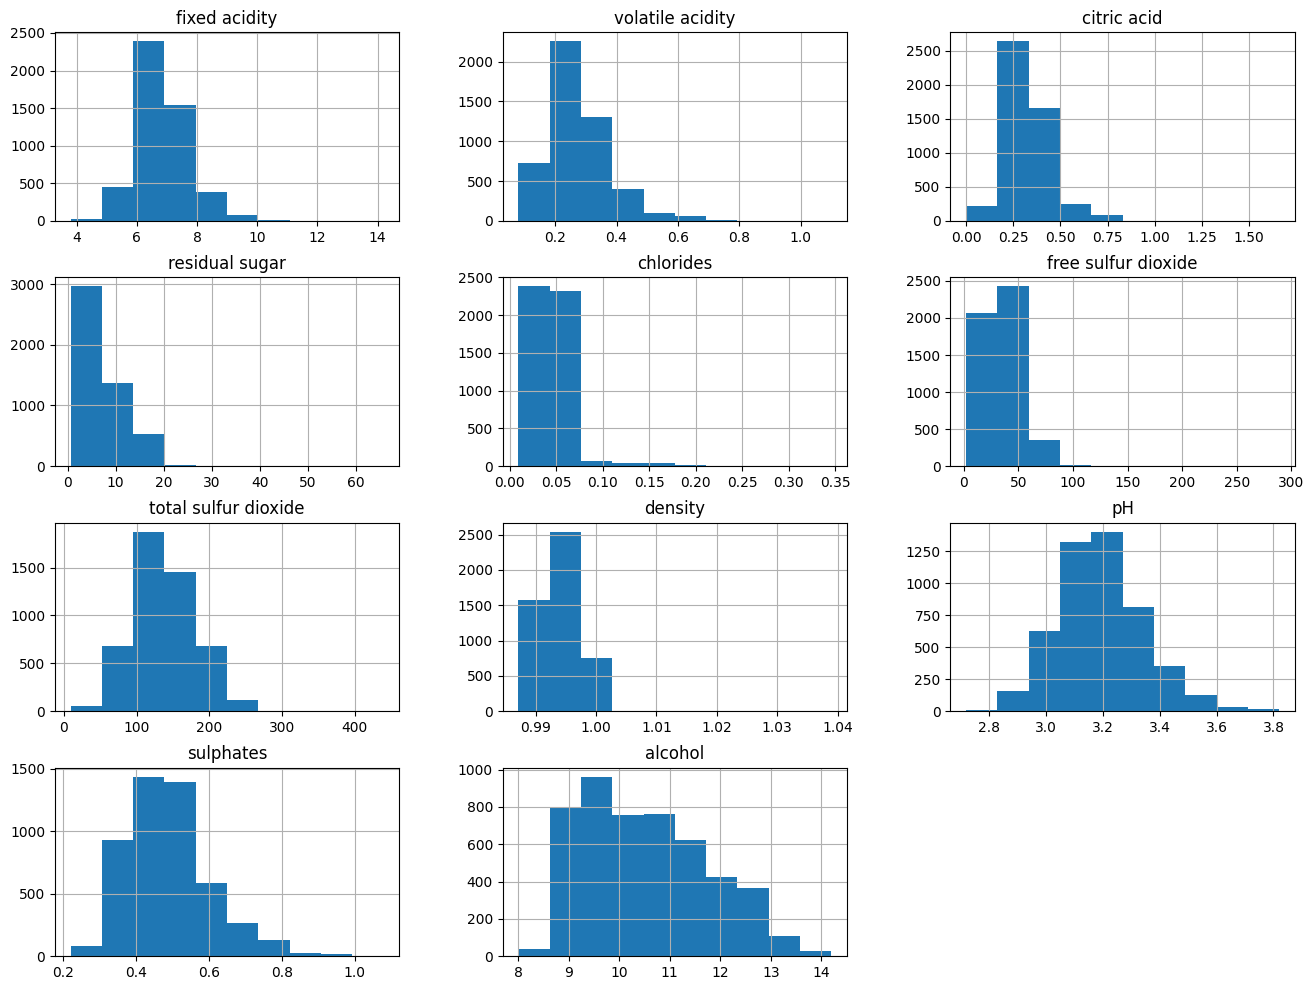

In [14]:
# Analisando distribuição das variáveis (aparentemente sem Outliers)

white_wines[features].hist(figsize=(16, 12));

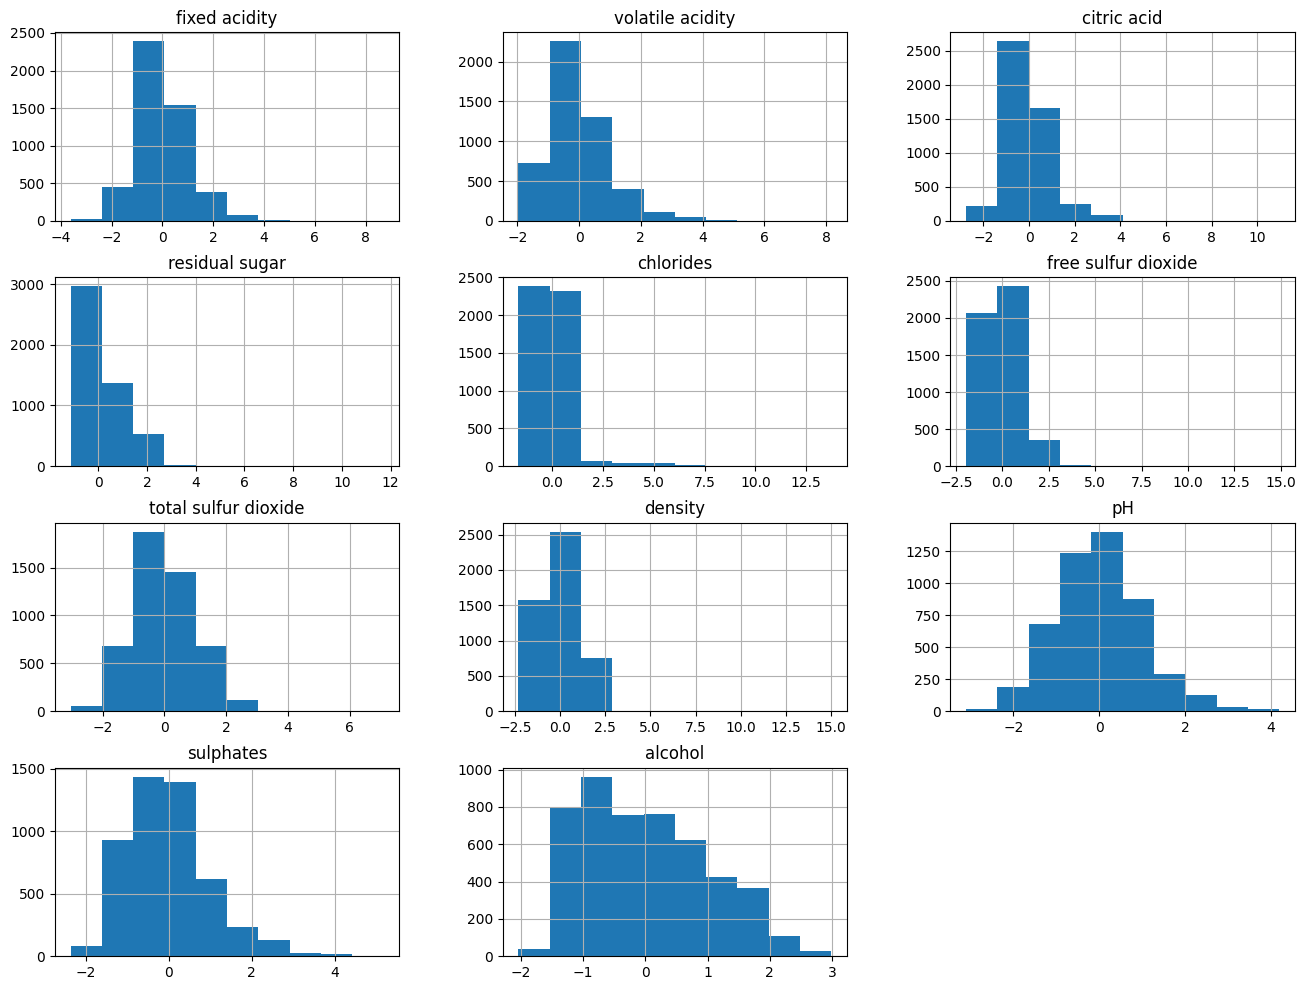

In [15]:
# Escalonando com StandardScaler (ss)

df_ss = white_wines.copy()
ss = StandardScaler()
df_ss[features] = ss.fit_transform(white_wines[features])
df_ss[features].hist(figsize=(16,12));

C:\Users\Fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\paretochart\paretochart.py:198: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(yt)


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
fixed acidity,0.156807,-0.586715,0.128982,0.032206,0.245284,0.105878,-0.200063,0.568050,0.362193,0.137510,-0.001101
volatile acidity,0.009469,0.041054,-0.600492,0.262179,0.638486,-0.095564,0.272563,0.016690,-0.112103,0.203742,-0.152396
citric acid,0.142362,-0.338542,0.501410,0.177869,0.048582,-0.131000,0.704807,-0.135527,-0.214305,0.032896,-0.018081
residual sugar,0.424859,0.008972,-0.183148,-0.297854,0.013069,0.293808,0.212858,-0.404342,0.372568,-0.066528,0.130690
chlorides,0.213394,-0.010190,-0.131626,0.682912,-0.338649,-0.401122,-0.079322,-0.142295,0.406764,-0.040571,0.028342
free sulfur dioxide,0.297051,0.296314,0.288142,-0.282421,0.201516,-0.491878,-0.166277,-0.074575,0.101365,0.577796,0.019107
total sulfur dioxide,0.404966,0.245760,0.123673,-0.042399,0.302837,-0.270052,-0.064986,0.246376,-0.109847,-0.718081,0.004243
density,0.510587,0.004957,-0.117580,-0.038118,-0.092970,0.326720,0.108363,0.059312,0.100350,0.067568,-0.022135
pH,-0.127702,0.582522,0.110817,0.109007,-0.129341,0.190603,0.423009,0.523518,0.282179,0.118946,0.017826
sulphates,0.042239,0.224481,0.411649,0.473217,0.371391,0.490529,-0.312507,-0.265593,-0.037273,0.060840,0.028500


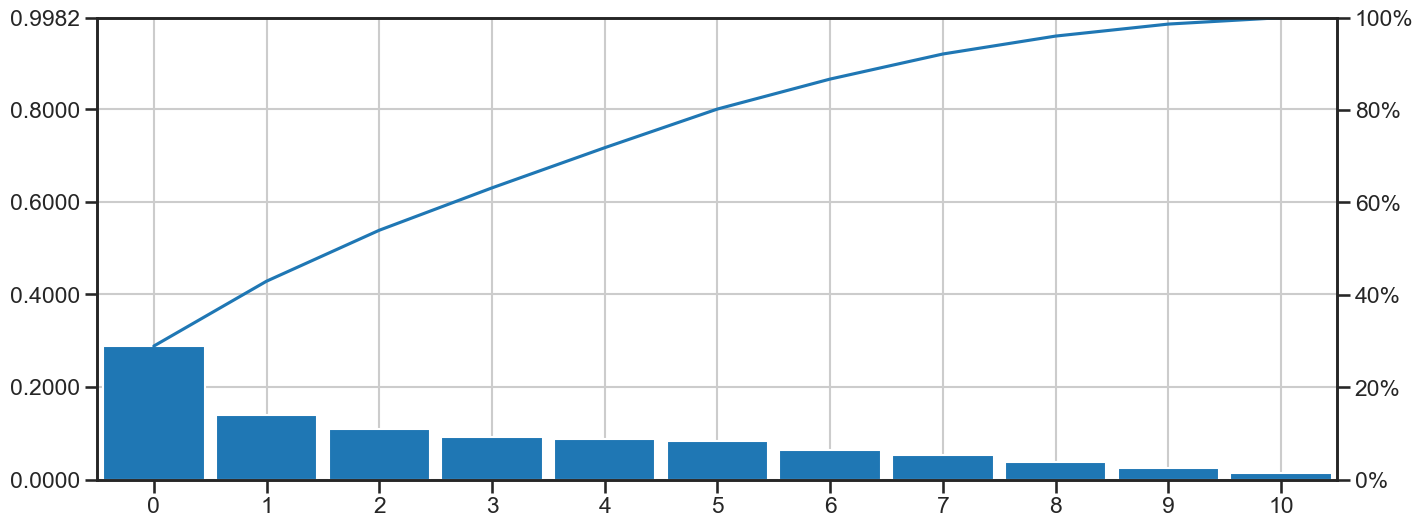

In [48]:
# Usando PCA / Pareto (Com 7 variáveis já ultrapassa 95%, poderia ser uma boa reduzir a dimensionalidade para 7.)

# !pip install rogeriopradoj-paretochart

from sklearn.decomposition import PCA
from paretochart.paretochart import pareto

pca= PCA(n_components=11)
pca.fit(df_ss)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
pareto(pca.explained_variance_ratio_)
ax.grid()

pd.DataFrame(pca.components_.T, columns=[f'PC{d}' for d in range(11)], index=df_ss.columns)

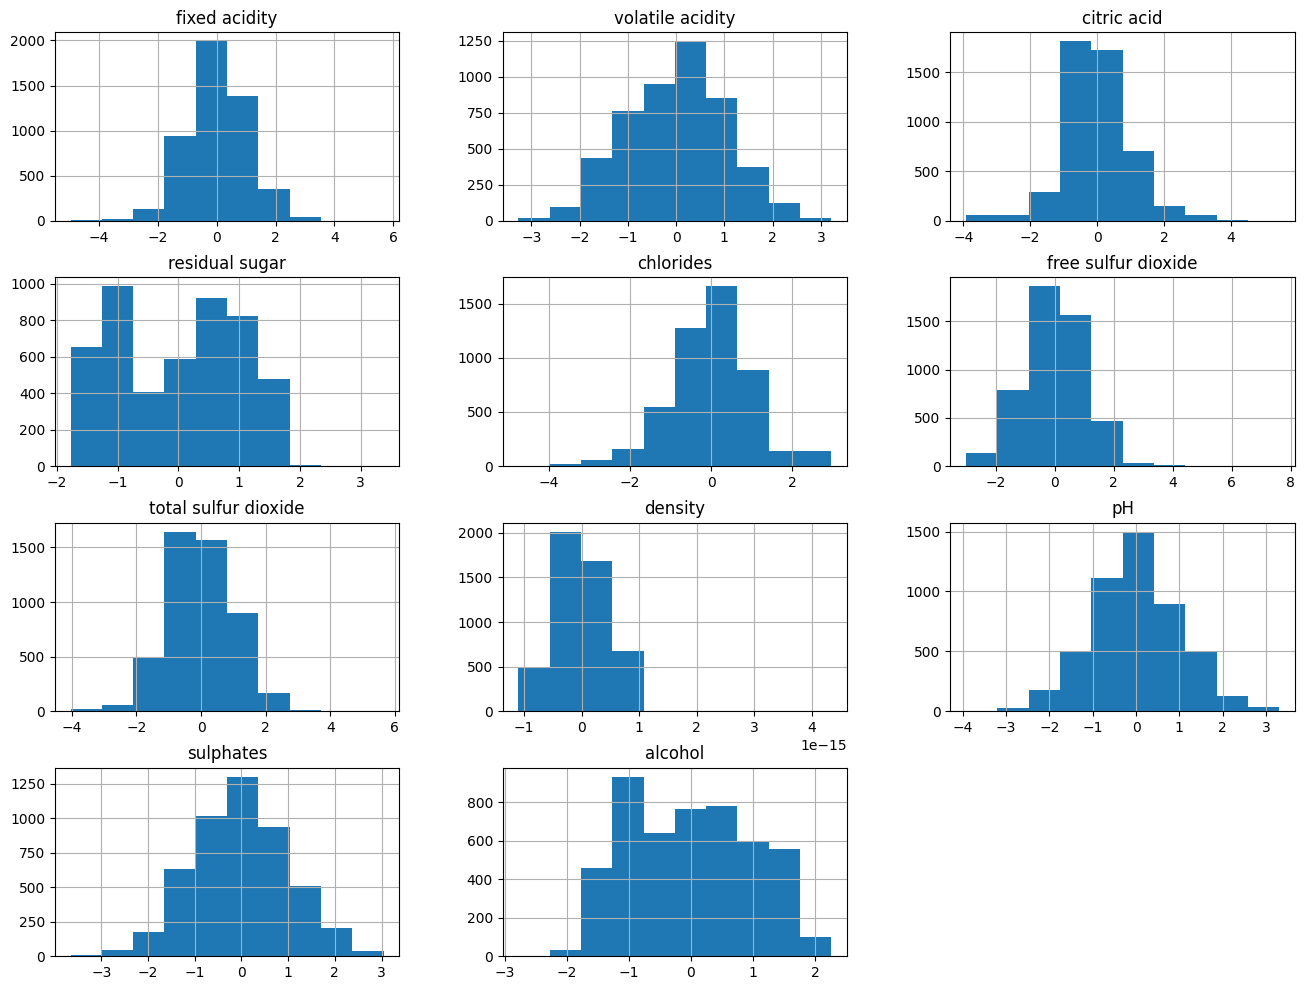

In [16]:
# Escalonando com PowerTransformer (pt) - Apply a power transform featurewise to make data more Gaussian-like

df_pt = white_wines.copy()
pt = PowerTransformer()
df_pt[features] = pt.fit_transform(white_wines[features])
df_pt[features].hist(figsize=(16,12));

In [17]:
# Com todos os dados preparados, iniciamos redes neurais

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold)
from sklearn.metrics import (f1_score,
                             ConfusionMatrixDisplay,
                             classification_report)

# Neural network
from sklearn.neural_network import MLPClassifier

In [18]:
wines['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [19]:
wines[features]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [20]:
wines['opinion']

0       1
1       1
2       1
3       1
4       1
       ..
6491    1
6492    0
6494    1
6495    0
6496    1
Name: opinion, Length: 6463, dtype: int64

Agora defina o modelo de redes neural do tipo MLP que você irá utilizar. Essa é a fase de MODELAGEM:
Quantas camadas?
Quantos neurônios na camada de entrada?
Quantos neurônios na camada de saída? Justifique.
Quantos números de neurônios na camada intermediária? Como esse número foi escolhido?

RESPONDENDO:

Como são 11 features, serão 11 neurõnios na primeira camada (camada de entrada). 
Na última camada, sempre é apenas um neurônio, pois é assim que funciona toda rede neural. 
O número de neurônios na camada intermediárias escolhemos usando o gráfico abaixo, de forma a maximizar o resultado de F1 Score
mas sem overtraining: 26.

In [21]:
X = wines[features].values
y = wines['opinion'].values

X_train_cv, X_test, y_train_cv, y_test = train_test_split(X,
                                                          y,
                                                          test_size=0.2, # 20 % da base
                                                          random_state=42,
                                                          stratify=y)

In [22]:
X_train_cv

array([[ 7.3  ,  0.17 ,  0.23 , ...,  3.36 ,  0.54 , 10.   ],
       [10.9  ,  0.32 ,  0.52 , ...,  3.28 ,  0.77 , 11.5  ],
       [ 6.2  ,  0.26 ,  0.32 , ...,  3.31 ,  0.61 ,  9.4  ],
       ...,
       [ 6.1  ,  0.22 ,  0.49 , ...,  3.3  ,  0.46 ,  9.6  ],
       [ 8.6  ,  0.265,  0.36 , ...,  2.95 ,  0.36 , 11.4  ],
       [ 6.3  ,  0.25 ,  0.23 , ...,  3.14 ,  0.35 ,  9.7  ]])

In [23]:
mlp = MLPClassifier(random_state=42)

In [24]:

def train(X, y, model_klass, **kwargs):
    cv = StratifiedKFold(n_splits=5)
    f1_score_val_list = []
    f1_score_train_list = []
    model_list =[]
    scaler_list = []
    # Validação cruzada só em Training Data
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train = X[train_idx, :]
        y_train = y[train_idx]
        X_val = X[val_idx, :]
        y_val = y[val_idx]

        # Escala
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        scaler_list.append(scaler)

        # Treino
        model = model_klass(**kwargs)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_train_scaled)

        y_pred_val = model.predict(X_val_scaled)
        print(f"========================= FOLD {fold} ==========================")
        print(f"Meu resultado para treino de F1-Score é {f1_score(y_train, y_pred, average='macro'):.2}")
        print(f"Meu resultado para validação de F1-Score é {f1_score(y_val, y_pred_val, average='macro'):.2}") 
        f1_score_val_list.append(f1_score(y_val, y_pred_val, average='macro'))
        f1_score_train_list.append(f1_score(y_train, y_pred, average='macro'))
        model_list.append(model)
    print()
    print()
    mean_val = np.mean(f1_score_val_list)
    std_val = np.std(f1_score_val_list)
    print(f"Meu resultado de F1-Score Médio de treino é {np.mean(f1_score_train_list): .2} +- {np.std(f1_score_train_list): .2} ")
    print(f"Meu resultado de F1-Score Médio de validação é {mean_val: .2} +- {std_val: .2} ")
    print()

    best_model_idx = np.argmax(f1_score_val_list)
    print(f"Meu melhor fold é: {best_model_idx} ")
    best_model = model_list[best_model_idx]

    return best_model, mean_val, std_val, scaler_list[best_model_idx]

In [25]:
results =[]
for neurons in range(1, 30):
    model, mean_val, std_val, scaler = train(X_train_cv, y_train_cv,
                                             MLPClassifier,
                                             hidden_layer_sizes=(neurons,),
                                             max_iter=10000,
                                             activation="logistic",
                                             alpha=1e-5,
                                             tol=1e-3,
                                             learning_rate_init=.3,
                                             solver='sgd')
            
    results.append((model, scaler, mean_val, std_val))

results = pd.DataFrame(results, columns = ["model", 'scaler',"mean f1", "std f1"])

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 0.72
Meu resultado para validação de F1-Score é 0.7
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.72
Meu resultado para validação de F1-Score é 0.71
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 0.72
Meu resultado para validação de F1-Score é 0.7
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 0.72
Meu resultado para validação de F1-Score é 0.72
========================= FOLD 4 ==========================
Meu resultado para treino de F1-Score é 0.71
Meu resultado para validação de F1-Score é 0.72


Meu resultado de F1-Score Médio de treino é  0.72 +-  0.0018 
Meu resultado de F1-Score Médio de validação é  0.71 +-  0.008 

Meu melhor fold é: 4 
========================= FOLD 0 ==========================
Meu resultado para treino 

![Alt text](confusion%20matrix.jpeg)

Text(0.5, 0, 'N Neurons')

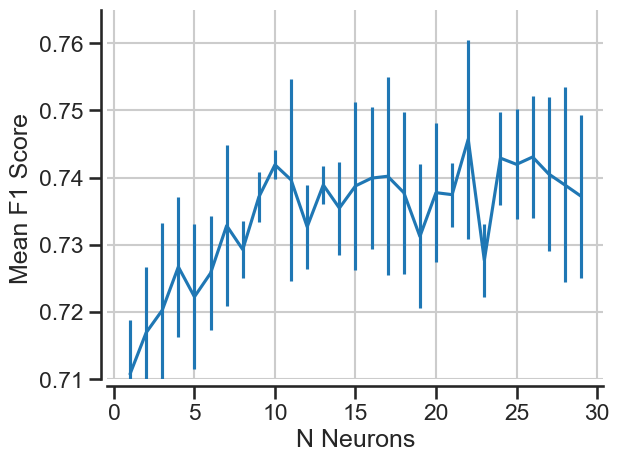

In [26]:
sns.set_style("ticks")
sns.set_context("talk")
plt.errorbar(range(1, 30), results["mean f1"], results["std f1"])
plt.grid(True)
sns.despine(offset=5)
plt.ylim([ 0.71 , 0.765])
plt.ylabel("Mean F1 Score ")
plt.xlabel("N Neurons")

Confusion matrix:
[[314 161]
 [148 670]]


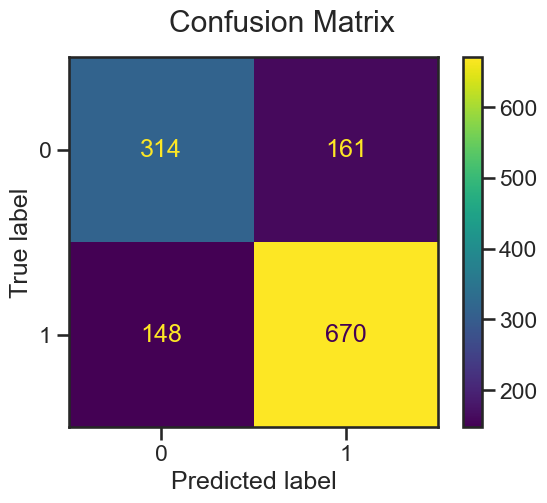

In [27]:
n_neurons = 26

X_test_scaled = results.scaler[n_neurons - 1].transform(X_test)

disp = ConfusionMatrixDisplay.from_predictions(y_test, results.model[n_neurons - 1].predict(X_test_scaled))
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

Com outros valores de neurons, as Confusion Matrix foram:

24:
[[317 158]
 [146 672]]

16:
Confusion matrix:
[[315 160]
 [158 660]]

23:
Confusion matrix:
[[285 190]
 [112 706]]

In [28]:
print(classification_report(y_test, results.model[n_neurons - 1].predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       475
           1       0.81      0.82      0.81       818

    accuracy                           0.76      1293
   macro avg       0.74      0.74      0.74      1293
weighted avg       0.76      0.76      0.76      1293



In [29]:
from sklearn.linear_model import LogisticRegression

logit, logit_mean_val, logit_std_val, logit_scaler = train(X_train_cv, y_train_cv, LogisticRegression, solver='newton-cg')

========================= FOLD 0 ==========================
Meu resultado para treino de F1-Score é 0.72
Meu resultado para validação de F1-Score é 0.7
========================= FOLD 1 ==========================
Meu resultado para treino de F1-Score é 0.72
Meu resultado para validação de F1-Score é 0.71
========================= FOLD 2 ==========================
Meu resultado para treino de F1-Score é 0.71
Meu resultado para validação de F1-Score é 0.71
========================= FOLD 3 ==========================
Meu resultado para treino de F1-Score é 0.71
Meu resultado para validação de F1-Score é 0.72
========================= FOLD 4 ==========================
Meu resultado para treino de F1-Score é 0.71
Meu resultado para validação de F1-Score é 0.71


Meu resultado de F1-Score Médio de treino é  0.71 +-  0.0039 
Meu resultado de F1-Score Médio de validação é  0.71 +-  0.0053 

Meu melhor fold é: 3 


In [30]:
pd.DataFrame(logit.predict_proba(X_test_scaled))

,0,1
0,0.313238,0.686762
1,0.052954,0.947046
2,0.073718,0.926282
3,0.528420,0.471580
4,0.211477,0.788523
...,...,...
1288,0.109647,0.890353
1289,0.263083,0.736917
1290,0.267792,0.732208
1291,0.650066,0.349934
